# Logistic Regression

### Joseph Melby, 2023

This notebook contains an implementation and testing of a logistic classifier written (mostly) from
scratch. This particular implementation only uses NumPy, pandas, and some visualization tools, as
well as some data manipulation tools from scikit-learn.

### Logistic Regression Class

Here we will define a logistic regression class with all the necessary functions. We will need a
couple functions outside of this class as well.

We use gradient descent as an optimization algorithm to learn the best fitting parameters for our
model. We do this using the first derivatives of our cost function to find the direction of steepest
descent on the parameter space. 

fit() is a vectorized version of the gradient descent algorithm.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Standardize data function
def standardize(X):
    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - np.mean(X[:, i]))/np.std(X[:, i])

# Define an accuracy score
# We will use the F1 score, which is the harmonic mean of precision and recall. 
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [4]:
class LogisticRegression():

    # Define sigmoid function
    def sigmoid(self, z):
        sig = 1/(1+np.e**(-z))
        return sig
    
    # Initialization
    def initialize(self, X):
        # initialize weights
        weights = np.zeros((X.shape[1] + 1, 1))
        # Add a bias column of ones to X
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        return weights, X
    
    # Define cost function for logistic regression
    def cost(self, theta, X, y):
        z = np.dot(X, theta)
        cost0 = y.T.dot(np.log(self.sigmoid(z)))
        cost1 = (1 - y).T.dot(np.log(1-self.sigmoid(z)))
        cost = -(cost1 + cost0)/len(y)
        return cost
    
    def fit(self, X, y, alpha = 0.01, num_it = 100):
        params, X = self.initialize(X)
        costs = np.zeros(num_it,)
        for i in range(num_it):
            params = params - alpha*np.dot(X.T, self.sigmoid(np.dot(X, params)) - np.reshape(y, (len(y), 1)))
            costs[i] = self.cost(params, X, y)
        self.weights = params
        return costs
    
    # Define a prediction function
    def predict(self, X):
        z = np.dot(self.initialize(X)[1], self.weights)
        pred = []
        for i in self.sigmoid(z):
            if i > 0.5:
                pred.append(1)
            else: 
                pred.append(0)
        return pred

### Basic Synthetic Data Set

In [5]:
## Generate the random data
np.random.seed(440)
n_rows = 100
diff = .1
X = np.random.random((n_rows,2))
X_prime = X[(X[:,1] - X[:,0]) <= -diff,:]
X_2prime = X[(X[:,1] - X[:,0]) >= diff,:]

del X
X = np.append(X_prime,X_2prime,axis = 0)

y = np.empty(np.shape(X)[0])
y[(X[:,1] - X[:,0]) <= -diff] = 1
y[((X[:,1] - X[:,0]) >= diff)] = 0

X[1,:] = [.8,.1]

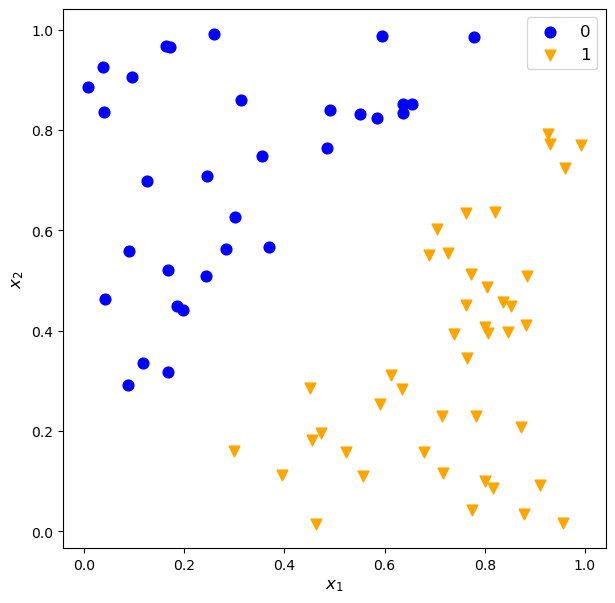

In [6]:
## Plot the data
plt.figure(figsize = (7,7))

plt.scatter(X[y == 0,0],
            X[y == 0,1],
            c = "blue",
            s = 60,
            label="0")
plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c = "orange",
            marker = 'v',
            s = 60,
            label="1")

plt.legend(fontsize = 12)
plt.xlabel("$x_1$",fontsize = 12)
plt.ylabel("$x_2$",fontsize = 12)

plt.show()

Let's split our data into training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    shuffle=True,
                                    random_state=435,
                                    test_size=.3,
                                    stratify=y)

In [8]:
standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 1.0
Test F1 score is 1.0


##### Messier Data Set

Let's try this again on a messier data set with a less obvious decision boundary.

In [9]:
## Generate the random data
np.random.seed(440)
n_rows = 100
diff = .1
X = np.random.random((n_rows,2))
X_prime = X[(X[:,1] - X[:,0]) <= -diff,:]
X_2prime = X[(X[:,1] - X[:,0]) >= diff,:]
X_3prime = [[.4,.9],[.6,.45],[.7,.9],[.3,.19],[.1,.4]]

del X
X = np.append(X_prime,np.append(X_2prime,X_3prime,axis = 0),axis=0)

y = np.empty(np.shape(X)[0])
y[(X[:,1] - X[:,0]) <= -diff] = 1
y[((X[:,1] - X[:,0]) >= diff)] = 0
y[-5] = 1
y[-4] = -1
y[-3] = 1
y[-2] = -1
y[-1] = 1

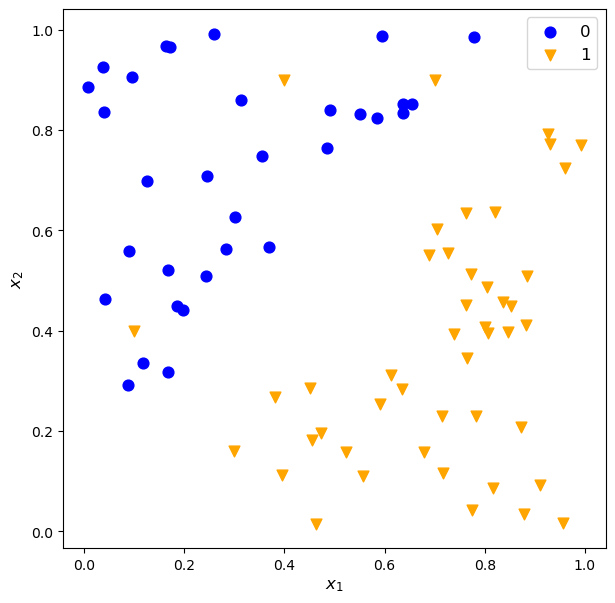

In [10]:
plt.figure(figsize = (7,7))

plt.scatter(X[y == 0,0],
            X[y == 0,1],
            c = "blue",
            s = 60,
            label="0")
plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c = "orange",
            s = 60,
            marker = "v",
            label="1")

plt.legend(fontsize = 12)
plt.xlabel("$x_1$",fontsize = 12)
plt.ylabel("$x_2$",fontsize = 12)

plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    shuffle=True,
                                    random_state=435,
                                    test_size=.3,
                                    stratify=y)

In [12]:
standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 0.9841269841269841
Test F1 score is 0.888888888888889


This looks pretty good for our small data set!

### Iris Data Set

Now we can apply this procedure to a more interesting data set: the Iris data set, which is
described in detail at: https://archive.ics.uci.edu/dataset/53/iris

Each observation represents an iris (a type of flower) and gives it's measurements including:
- `sepal_length`: the length of the iris's sepal in cm.
- `sepal_width`: the width of the iris's sepal in cm.
- `petal_length`: the length of the iris's petal in cm.
- `petal_width`: the width of the iris's petal in cm.
- `iris_class`: the class of the iris, can be:
    - `0` meaning it is a setosa iris
    - `1` meaning it is a versicolor iris
    - `2` meaning it is a virginica iris

You can take a look at some of the EDA for this data set done in the Single_Layer_Perceptron.ipynb
notebook in this repository, so we will just load this and split up our data right away here.

In [13]:
## to get the iris data
from sklearn.datasets import load_iris

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

In [14]:
## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])

Since our model is a binary classifier,
let's just see if we can separate the setosa iris (class 0) observations from the other two.

To do so, we need to reassign any observation with iris_class = 2 to iris_class = 1.

In [20]:
# Changing all the iris_class = 2 to class 1 so that we can use our binary classifier
iris_train.loc[iris_train.iris_class == 2, 'iris_class'] = 1

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 2, 'iris_class'] = 1

In [21]:
# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()

In [22]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1])

Looks like our iris classes look good. Now we can train and test our model.

In [24]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 1.0
Test F1 score is 1.0


It looks like this does fairly well in separating iris class 0 from the other two. Let's also
compare the other two and see whether we get similar discriminating power. We will need to reload
the data set a couple times to do this of course.

In [31]:
## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])

# Changing all the iris_class = 1 to class 0 so that we can use our binary classifier to hopefully
# separate class 2 from the others
iris_train.loc[iris_train.iris_class == 1, 'iris_class'] = 0

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 1, 'iris_class'] = 0


# We also need to re-assign the value of class 2 to 1 so that our sigmoid activation function works
# properly 
iris_train.loc[iris_train.iris_class == 2, 'iris_class'] = 1

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 2, 'iris_class'] = 1


# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()
print(y_test)

[1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 1]


In [32]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 0.9599999999999999
Test F1 score is 0.962962962962963


Looks like it did pretty well! Moving on now to see if our model separates class 1 from the other two.

In [33]:
## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])

# Changing all the iris_class = 1 to class 0 so that we can use our binary classifier to hopefully
# separate class 2 from the others
iris_train.loc[iris_train.iris_class == 2, 'iris_class'] = 0

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 2, 'iris_class'] = 0

# We can leave class 1 alone here


# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()
print(y_test)

[0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1
 0]


In [34]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 0.4918032786885246
Test F1 score is 0.5454545454545455


In [38]:
print(list(y_test))
print(y_test_pred)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]


Clearly this does not perform as well in attempting to separate class 1 from the other two. As a
final exploration, we will compare class 1 to each of the other two individually and see if there is
anything we can learn from that.

In [40]:
#### Comparing classes 1 and 0

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

# Remove all class 2 observations
iris_df = iris_df.loc[iris_df.iris_class < 2]

## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])


# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()
print(y_test)

[0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]


In [41]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 1.0
Test F1 score is 1.0


Looks like we get great separation between classes 0 and 1, as expected.

In [42]:
#### Comparing classes 1 and 2

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

# Remove all class 2 observations
iris_df = iris_df.loc[iris_df.iris_class > 0]

## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])

# Changing all the iris_class = 1 to class 0 so that we can use our binary classifier
iris_train.loc[iris_train.iris_class == 1, 'iris_class'] = 0

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 1, 'iris_class'] = 0


# We also need to re-assign the value of class 2 to 1 so that our sigmoid activation function works
# properly 
iris_train.loc[iris_train.iris_class == 2, 'iris_class'] = 1

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 2, 'iris_class'] = 1


# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()
print(y_test)

[0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]


In [43]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 0.9866666666666666
Test F1 score is 0.962962962962963


In [45]:
#### Comparing classes 0 and 2

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

# Remove all class 2 observations
iris_df = iris_df.loc[iris_df.iris_class != 1]

## Making a statified train test split
iris_train, iris_test = train_test_split(iris_df, 
                                            random_state=431,
                                            shuffle=True,
                                            test_size=.25,
                                            stratify=iris_df['iris_class'])


# We also need to re-assign the value of class 2 to 1 so that our sigmoid activation function works
# properly 
iris_train.loc[iris_train.iris_class == 2, 'iris_class'] = 1

# also be sure to make the same changes to the test set
iris_test.loc[iris_test.iris_class == 2, 'iris_class'] = 1


# Define our input and output for the training data
X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y_train = iris_train.iris_class.to_numpy()
y_test = iris_test.iris_class.to_numpy()
print(y_test)

[0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0]


In [46]:
# Load and fit our model:

standardize(X_train)
standardize(X_test)

# Initialize a class instance
logreg = LogisticRegression()

# Fit our model to the training data
model = logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

f1_score_train = F1_score(y_train, y_train_pred)
print("Training F1 score is %s" % f1_score_train)

# get prediction on test data
y_test_pred = logreg.predict(X_test)

f1_score_test = F1_score(y_test, y_test_pred)
print("Test F1 score is %s" % f1_score_test)

Training F1 score is 1.0
Test F1 score is 1.0


Takeaway here is that our model is very good at distinguishing class 0 from the other classes, but
is not quite as accurate distinguishing between classes 1 and 2. This is all good though; in a
future notebook we will build from scratch a multi-class logistic model to better handle this kind
of data set. 